# **Polynomial Model**

![Alternative Text](Temporal_Decisions.png)
$$x_1+x_2=x_3$$
$$x_3-x_4^2=x_5$$
$$2x_2+x_4=x_6$$
$$x_5+\sqrt{x_6}-x_7=x_8$$
$$x_8-2(x_9+x_1^3)=x_{10}$$

The ultimate goal is to determine the percentage of variables that converge into their acceptable ranges based on the order in which the analyses are performed.  The ranges for the alotted variables are given below.  These ranges would act in a similar manner as rules and/or requirements in a vessel design.

$$1 \leq x_1 < 5$$
$$1 \leq x_2 < 5$$
$$0 \leq x_3 < 8.5$$
$$0.5 \leq x_4 < 6$$
$$-2 \leq x_5 < 9$$
$$1.5 \leq x_6 < 10$$
$$-3.5 \leq x_7 < 4$$
$$-3.5 \leq x_8 < 2.5$$
$$-4 \leq x_9 < 3$$
$$1 \leq x_{10} < 10$$

The polynomial model runs its analyses in 4 different orders: (1) 1,2,3,4; (2) 2,1,3,4; (3) 3,4,1-2, (4) 4,1,2-3.  Each of the paths will start by creating 10,000 different sets of input variables within the ranges shown above, and the other values will be backed out based on the provided equations.  At the end of each of path assessment, all ten variables will be evaluated to see what percentage of the 10 variables fall within their alotted range.  The inputs will always fall within the range as they are given values randomly within their known bounds.  The outputs will fall within or out of range based on the combination of inputs chosen.

***
***
***

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

***

### Input Variable Subroutine

*Creating the random values for the necessary inputs based on the chosen path and known variable bounds.*

In [2]:
def random_inputs(Path, var, runs, input_vars, x1_lwr, x1_upr, x2_lwr, x2_upr, x3_lwr, x3_upr, x4_lwr, x4_upr,\
                  x5_lwr, x5_upr, x6_lwr, x6_upr, x7_lwr, x7_upr, x8_lwr, x8_upr, x9_lwr, x9_upr, x10_lwr, x10_upr):
    
    # Create random input variables based on the path info
    for i in range(0,len(Path1)):
        if input_vars[0] == 1:
            Path[i,0] = np.random.uniform(x1_lwr,x1_upr)
        if input_vars[1] == 1:
            Path[i,1] = np.random.uniform(x2_lwr,x2_upr)
        if input_vars[2] == 1:
            Path[i,2] = np.random.uniform(x3_lwr,x3_upr)
        if input_vars[3] == 1:
            Path[i,3] = np.random.uniform(x4_lwr,x4_upr)
        if input_vars[4] == 1:
            Path[i,4] = np.random.uniform(x5_lwr,x5_upr)
        if input_vars[5] == 1:
            Path[i,5] = np.random.uniform(x6_lwr,x6_upr)
        if input_vars[6] == 1:
            Path[i,6] = np.random.uniform(x7_lwr,x7_upr)
        if input_vars[7] == 1:
            Path[i,7] = np.random.uniform(x8_lwr,x8_upr)
        if input_vars[8] == 1:
            Path[i,8] = np.random.uniform(x9_lwr,x9_upr)
        if input_vars[9] == 1:
            Path[i,9] = np.random.uniform(x10_lwr,x10_upr)
    
    # Return path matrix
    return Path

### Analysis Subroutines

*Defining the analysis functions that will be called on later.*

In [3]:
# Analysis 1 - forward and backward
def analysis1(number1, number2):
    number3 = number1 + number2
    return number3

def analysis1_back(number3, number1or2):
    number2or1 = number3 - number1or2
    return number2or1


# Analysis 1 & 2 Combined
def analysis12(number1, number5, number6):
    number4 = ((-1/2) + ((1/2)**2 - 4*1*(number5 - number1 - number6/2))**(1/2)) / (2*1)
    return number4


# Analysis 2
def analysis2(number2, number3, number4):
    number5 = number3 - number4**2
    number6 = 2*number2 + number4
    return number5, number6

def analysis2_back4(number5, number6, number4):
    number2 = (number6 - number4) / 2
    number3 = number5 + number4**2
    return number2, number3
    

# Analysis 3
def analysis3(number5, number6, number7):
    number8 = number5 + number6**(1/2) - number7
    return number8

def analysis3_back7(number5, number6, number8):
    number7 = number5 + number6**(1/2) - number8
    return number7


# Analysis 4
def analysis4(number8, number9, number1):
    number10 = number8 - 2*(number9 + number1**3)
    return number10

### Variable Checking Subroutine

*Checking that the variables fall within their bounds and the exact success of each run regardless for a path.*

In [4]:
def variable_checker(Path, Path_success, Run_success, Var):
    
    # Set up a counting variable
    count = 0
    
    # Set up successful run arrays with a single row of zeros (first row will later be deleted)
    Path_success_10var = np.zeros((1, Var))
    Path_success_9var = np.zeros((1, Var))
    Path_success_8var = np.zeros((1, Var))
    
    # Check variable ranges and run success
    for i in range(0,len(Path)):
        if Path[i,0] >= 1 and Path[i,0] < 5:
            Path_success[0] += 1
            count += 1
        if Path[i,1] >=1 and Path[i,1] < 5:
            Path_success[1] += 1
            count += 1
        if Path[i,2] >= 0 and Path[i,2] < 8.5:
            Path_success[2] += 1
            count += 1
        if Path[i,3] >= 0.5 and Path[i,3] < 6:
            Path_success[3] += 1
            count += 1
        if Path[i,4] >= -2 and Path[i,4] < 9:
            Path_success[4] += 1
            count += 1
        if Path[i,5] >= 1.5 and Path[i,5] < 10:
            Path_success[5] += 1
            count += 1
        if Path[i,6] >= -3.5 and Path[i,6] < 4:
            Path_success[6] += 1
            count += 1
        if Path[i,7] >= -3.5 and Path[i,7] < 2.5:
            Path_success[7] += 1
            count += 1
        if Path[i,8] >= -4 and Path[i,8] < 3:
            Path_success[8] += 1
            count += 1
        if Path[i,9] >= 1 and Path[i,9] < 10:
            Path_success[9] += 1
            count += 1
        Run_success[count] += 1
        
        # Return vector values having at least 10, 9, 8 sucessful variables
        if count >= 10:
            Path_success_10var = np.append(Path_success_10var, [Path[i,:]], axis=0)
        if count >= 9:
            Path_success_9var = np.append(Path_success_9var, [Path[i,:]], axis=0)
        if count >= 8:
            Path_success_8var = np.append(Path_success_8var, [Path[i,:]], axis=0)
        
        # Reset the count to 0
        count = 0
    
    return Path_success, Run_success, Path_success_10var, Path_success_9var, Path_success_8var

### Variable Success Subroutine

*Convert successful results into a percentage for each variable and each run of a path.*

In [5]:
def success_percent(Path, Path_success, Run_success):
    Path_success = np.around(Path_success / len(Path) * 100, 2)
    Run_success = np.around(Run_success / len(Path) * 100, 2)
    return Path_success, Run_success

***
***
***

## **One-Step Sequential Model**

*No knowledge generation - No rework - No modifiable path selection - No concurrent engineering - No set based approaches - No proactive path metrics*

### Random Inputs

*Assigning random float values to the necessary inputs of each path within the respective variable bounds.*

In [6]:
# Define number of polynomial variables and runs for each path and input variable vector
Var = 10
Runs = 10000

# Define path matrices and fill with zeros
Path1 = np.zeros((Runs, Var))
Path2 = np.zeros((Runs, Var))
Path3 = np.zeros((Runs, Var))
Path4 = np.zeros((Runs, Var))



# Assign initial random input bounds for each variable
x1_lwr = 1.0
x1_upr = 5.0
x2_lwr = 1.0
x2_upr = 5.0
x3_lwr = 0.0
x3_upr = 8.5
x4_lwr = 0.5
x4_upr = 6.0
x5_lwr = -2.0
x5_upr = 9.0
x6_lwr = 1.5
x6_upr = 10.0
x7_lwr = -3.5
x7_upr = 4.0
x8_lwr = -3.5
x8_upr = 2.5
x9_lwr = -4.0
x9_upr = 3.0
x10_lwr = 1.0
x10_upr = 10.0

# Populate each path array with the neccessary randomized input variables (1 indicates a variable needing an input for specific path)
Path1 = random_inputs(Path1, Var, Runs, [1, 1, 0, 1, 0, 0, 1, 0, 1, 0], x1_lwr, x1_upr, x2_lwr, x2_upr, x3_lwr, x3_upr, x4_lwr, x4_upr,\
                     x5_lwr, x5_upr, x6_lwr, x6_upr, x7_lwr, x7_upr, x8_lwr, x8_upr, x9_lwr, x9_upr, x10_lwr, x10_upr)
Path2 = random_inputs(Path2, Var, Runs, [0, 1, 1, 1, 0, 0, 1, 0, 1, 0], x1_lwr, x1_upr, x2_lwr, x2_upr, x3_lwr, x3_upr, x4_lwr, x4_upr,\
                     x5_lwr, x5_upr, x6_lwr, x6_upr, x7_lwr, x7_upr, x8_lwr, x8_upr, x9_lwr, x9_upr, x10_lwr, x10_upr)
Path3 = random_inputs(Path3, Var, Runs, [1, 0, 0, 0, 1, 1, 1, 0, 1, 0], x1_lwr, x1_upr, x2_lwr, x2_upr, x3_lwr, x3_upr, x4_lwr, x4_upr,\
                     x5_lwr, x5_upr, x6_lwr, x6_upr, x7_lwr, x7_upr, x8_lwr, x8_upr, x9_lwr, x9_upr, x10_lwr, x10_upr) # Need either x1, x2, x3, or x4
Path4 = random_inputs(Path4, Var, Runs, [1, 1, 0, 1, 0, 0, 0, 1, 1, 0], x1_lwr, x1_upr, x2_lwr, x2_upr, x3_lwr, x3_upr, x4_lwr, x4_upr,\
                     x5_lwr, x5_upr, x6_lwr, x6_upr, x7_lwr, x7_upr, x8_lwr, x8_upr, x9_lwr, x9_upr, x10_lwr, x10_upr) # Need either x4, x5, x6, or x7

### Dependent Outputs

*Calling the analysis functions to produce the variable outputs.*

In [7]:
# Call analysis functions as necessary for first path
Path1[:,2] = analysis1(Path1[:,0], Path1[:,1])
Path1[:,4], Path1[:,5] = analysis2(Path1[:,1], Path1[:,2], Path1[:,3])
Path1[:,7] = analysis3(Path1[:,4], Path1[:,5], Path1[:,6])
Path1[:,9] = analysis4(Path1[:,7], Path1[:,8], Path1[:,0])

# Call analysis functions as necessary for second path
Path2[:,4], Path2[:,5] = analysis2(Path2[:,1], Path2[:,2], Path2[:,3])
Path2[:,0] = analysis1_back(Path2[:,2], Path2[:,1])
Path2[:,7] = analysis3(Path2[:,4], Path2[:,5], Path2[:,6])
Path2[:,9] = analysis4(Path2[:,7], Path2[:,8], Path2[:,0])

# Call analysis functions as necessary for third path
Path3[:,7] = analysis3(Path3[:,4], Path3[:,5], Path3[:,6])
Path3[:,9] = analysis4(Path3[:,7], Path3[:,8], Path3[:,0])
Path3[:,3] = analysis12(Path3[:,0], Path3[:,4], Path3[:,5]) # Warning can pop up for a complex number
Path3[:,1], Path3[:,2] = analysis2_back4(Path3[:,4], Path3[:,5], Path3[:,3])

# Call analysis functions as necessary for fourth path
Path4[:,9] = analysis4(Path4[:,7], Path4[:,8], Path4[:,0])
Path4[:,2] = analysis1(Path4[:,0], Path4[:,1])
Path4[:,4], Path4[:,5] = analysis2(Path4[:,1], Path4[:,2], Path4[:,3])
Path4[:,6] = analysis3_back7(Path4[:,4], Path4[:,5], Path4[:,7])

<ipython-input-3-bb944430dc8a>:13: RuntimeWarning: invalid value encountered in sqrt
  number4 = ((-1/2) + ((1/2)**2 - 4*1*(number5 - number1 - number6/2))**(1/2)) / (2*1)


### Path Dependency Statitistics

*Calculating the percentage of variables that fall within their given bounds for each path.*

In [8]:
# Create vector that tracks successful bounds for each variable of each path
Path1_success = np.zeros(len(Path1[0]))
Path2_success = np.zeros(len(Path2[0]))
Path3_success = np.zeros(len(Path3[0]))
Path4_success = np.zeros(len(Path4[0]))

# Create vector that tracks success of each run of each path (i.e. 10 successful variables, 9 successful variables, etc.)
Run1_success = np.zeros(len(Path1[0]) + 1)
Run2_success = np.zeros(len(Path2[0]) + 1)
Run3_success = np.zeros(len(Path3[0]) + 1)
Run4_success = np.zeros(len(Path4[0]) + 1)

# Loop through all of the variables checking their bounds and the run success for each path
Path1_success, Run1_success, Path1_success_10var, Path1_success_9var, Path1_success_8var = variable_checker(Path1, Path1_success, Run1_success, Var)
Path2_success, Run2_success, Path2_success_10var, Path2_success_9var, Path2_success_8var = variable_checker(Path2, Path2_success, Run2_success, Var)
Path3_success, Run3_success, Path3_success_10var, Path3_success_9var, Path3_success_8var = variable_checker(Path3, Path3_success, Run3_success, Var)
Path4_success, Run4_success, Path4_success_10var, Path4_success_9var, Path4_success_8var = variable_checker(Path4, Path4_success, Run4_success, Var)
    
# Turn results into a percentage for each variable and for each run of each path
Path1_success, Run1_success = success_percent(Path1, Path1_success, Run1_success)
Path2_success, Run2_success = success_percent(Path2, Path2_success, Run2_success)
Path3_success, Run3_success = success_percent(Path3, Path3_success, Run3_success)
Path4_success, Run4_success = success_percent(Path4, Path4_success, Run4_success)

### Results

*Displaying the results for each path.*

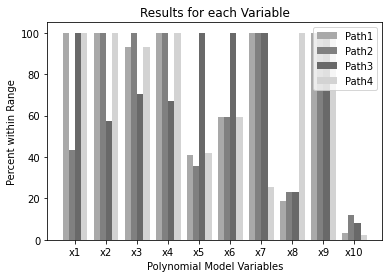

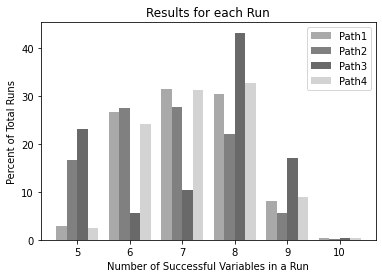

In [9]:
# Create a bar plot for all of the variables of all of the paths (light scale and color scale options)
x = np.arange(10)
x_data = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
plt.title("Results for each Variable")
#plt.bar(x-0.3, Path1_success, color = 'red', width = 0.2)
plt.bar(x-0.3, Path1_success, color = 'darkgray', width = 0.2)
#plt.bar(x-0.1, Path2_success, color = 'green', width = 0.2)
plt.bar(x-0.1, Path2_success, color = 'gray', width = 0.2)
#plt.bar(x+0.1, Path3_success, color = 'blue', width = 0.2)
plt.bar(x+0.1, Path3_success, color = 'dimgray', width = 0.2)
#plt.bar(x+0.3, Path4_success, color = 'brown', width = 0.2)
plt.bar(x+0.3, Path4_success, color = 'lightgray', width = 0.2)
plt.xticks(x, x_data)
plt.xlabel("Polynomial Model Variables")
plt.ylabel("Percent within Range")
plt.legend(["Path1", "Path2", "Path3", "Path4"], loc='upper right')
plt.show()

# Create a bar plot for all of the runs of all of the paths (light scale and color scale options)
x = np.arange(6)
x_data = ['5', '6', '7', '8', '9', '10']
plt.title("Results for each Run")
#plt.bar(x-0.3, Run1_success[5:11], color = 'red', width = 0.2)
plt.bar(x-0.3, Run1_success[5:11], color = 'darkgray', width = 0.2)
#plt.bar(x-0.1, Run2_success[5:11], color = 'green', width = 0.2)
plt.bar(x-0.1, Run2_success[5:11], color = 'gray', width = 0.2)
#plt.bar(x+0.1, Run3_success[5:11], color = 'blue', width = 0.2)
plt.bar(x+0.1, Run3_success[5:11], color = 'dimgray', width = 0.2)
#plt.bar(x+0.3, Run4_success[5:11], color = 'brown', width = 0.2)
plt.bar(x+0.3, Run4_success[5:11], color = 'lightgray', width = 0.2)
plt.xticks(x, x_data)
plt.xlabel("Number of Successful Variables in a Run")
plt.ylabel("Percent of Total Runs")
plt.legend(["Path1", "Path2", "Path3", "Path4"], loc='upper right')
plt.show()

***
***
***

## Multi-Step Sequential Model

*Knowledge generation - Rework - No modifiable path selection - No concurrent engineering - No set based approaches - No proactive path metrics*

The goal of this variation of the model is to take information on the range of variable values resulting in successful runs, and then to shrink the random variable generators to those ranges.  This should be done in two different ways: (1) strictly variable success should be considered and not overall run success, and (2) overall run success should be the only consideration.  The reason why the first method may not be satisfactory alone is because certain successful variable values may cause other variable values to be unsuccessful.  The second method uses results from the 10 (and maybe 9) successful variable runs.  Later on, the knowledge generation methods can be made more considerate and intricate (i.e. maybe some sort of results histogram having a gauss or some other type of distribution away from the average successful variable value), but for now, this will provide important results without allowing a human factor to develop.

### New Input Variable Range Assignment

*Creating new sets of restrictive random variable ranges based on variable success and run success.*

In [13]:
# Define rework path matrix and fill with copy of loop 1 matrices
Path1_re = np.copy(Path1)
Path2_re = np.copy(Path2)
Path3_re = np.copy(Path3)
Path4_re = np.copy(Path4)

# Eliminate initial zeros row of Path success matrices
Path1_success_10var = np.delete(Path1_success_10var, 0, 0)
Path1_success_9var = np.delete(Path1_success_9var, 0, 0)
Path1_success_8var = np.delete(Path1_success_8var, 0, 0)
Path2_success_10var = np.delete(Path2_success_10var, 0, 0)
Path2_success_9var = np.delete(Path2_success_9var, 0, 0)
Path2_success_8var = np.delete(Path2_success_8var, 0, 0)
Path3_success_10var = np.delete(Path3_success_10var, 0, 0)
Path3_success_9var = np.delete(Path3_success_9var, 0, 0)
Path3_success_8var = np.delete(Path3_success_8var, 0, 0)
Path4_success_10var = np.delete(Path4_success_10var, 0, 0)
Path4_success_9var = np.delete(Path4_success_9var, 0, 0)
Path4_success_8var = np.delete(Path4_success_8var, 0, 0)

# Return vector of maximum values for each variable
Path1_10var_max = np.amax(Path1_success_10var, axis=0)
Path2_10var_max = np.amax(Path2_success_10var, axis=0)
Path3_10var_max = np.amax(Path3_success_10var, axis=0)
Path4_10var_max = np.amax(Path4_success_10var, axis=0)

# Return vector of minimum values for each variable
Path1_10var_min = np.amin(Path1_success_10var, axis=0)
Path2_10var_min = np.amin(Path2_success_10var, axis=0)
Path3_10var_min = np.amin(Path3_success_10var, axis=0)
Path4_10var_min = np.amin(Path4_success_10var, axis=0)

# Use the max and min values as new bounds for newly generated normally-distributed random inputs
Path1_re = random_inputs(Path1_re, Var, Runs, [1, 1, 0, 1, 0, 0, 1, 0, 1, 0], Path1_10var_min[0], Path1_10var_max[0],\
                         Path1_10var_min[1], Path1_10var_max[1], Path1_10var_min[2], Path1_10var_max[2], Path1_10var_min[3], Path1_10var_max[3],\
                         Path1_10var_min[4], Path1_10var_max[4], Path1_10var_min[5], Path1_10var_max[5], Path1_10var_min[6], Path1_10var_max[6],\
                         Path1_10var_min[7], Path1_10var_max[7], Path1_10var_min[8], Path1_10var_max[8], Path1_10var_min[9], Path1_10var_max[9])
Path2_re = random_inputs(Path2_re, Var, Runs, [0, 1, 1, 1, 0, 0, 1, 0, 1, 0], Path2_10var_min[0], Path2_10var_max[0],\
                         Path2_10var_min[1], Path2_10var_max[1], Path2_10var_min[2], Path2_10var_max[2], Path2_10var_min[3], Path2_10var_max[3],\
                         Path2_10var_min[4], Path2_10var_max[4], Path2_10var_min[5], Path2_10var_max[5], Path2_10var_min[6], Path2_10var_max[6],\
                         Path2_10var_min[7], Path2_10var_max[7], Path2_10var_min[8], Path2_10var_max[8], Path2_10var_min[9], Path2_10var_max[9])
Path3_re = random_inputs(Path3_re, Var, Runs, [1, 0, 0, 0, 1, 1, 1, 0, 1, 0], Path3_10var_min[0], Path3_10var_max[0],\
                         Path3_10var_min[1], Path3_10var_max[1], Path3_10var_min[2], Path3_10var_max[2], Path3_10var_min[3], Path3_10var_max[3],\
                         Path3_10var_min[4], Path3_10var_max[4], Path3_10var_min[5], Path3_10var_max[5], Path3_10var_min[6], Path3_10var_max[6],\
                         Path3_10var_min[7], Path3_10var_max[7], Path3_10var_min[8], Path3_10var_max[8], Path3_10var_min[9], Path3_10var_max[9])
Path4_re = random_inputs(Path4_re, Var, Runs, [1, 1, 0, 1, 0, 0, 0, 1, 1, 0], Path4_10var_min[0], Path4_10var_max[0],\
                         Path4_10var_min[1], Path4_10var_max[1], Path4_10var_min[2], Path4_10var_max[2], Path4_10var_min[3], Path4_10var_max[3],\
                         Path4_10var_min[4], Path4_10var_max[4], Path4_10var_min[5], Path4_10var_max[5], Path4_10var_min[6], Path4_10var_max[6],\
                         Path4_10var_min[7], Path4_10var_max[7], Path4_10var_min[8], Path4_10var_max[8], Path4_10var_min[9], Path4_10var_max[9])

In [ ]:
# Add a maximum number of rework loops!

***
***
***

## Multi-Step Modifiable Sequential Model

*Knowledge generation - Rework - Modifiable path selection - No concurrent engineering - No set based approaches - No proactive path metrics*